In [1]:
# UFood Marketing Analysis

# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
ufood_df  =  pd.read_csv('/Users/sravanipilla/Downloads/u_food_marketing.csv')

In [3]:
ufood_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [4]:
# Setting up the display 
pd.set_option('display.max.rows',2300)
pd.set_option('display.max.columns',50)

# Data Cleaning

In [6]:
# Checking for Duplicates
ufood_df.duplicated().sum()

184

In [7]:
# Removing duplicates
ufood_df.drop_duplicates(keep='first', inplace=True)

In [28]:
# Checking for missing values
ufood_df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Feature Engineering

In [10]:
# Total Children
ufood_df['Total_Children'] = ufood_df['Kidhome'] + ufood_df['Teenhome']

In [11]:
ufood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [12]:
# Marital Status
ufood_df['marital_Widow']= ufood_df['marital_Widow'].replace({1:1,0:0})
ufood_df['marital_Together']= ufood_df['marital_Together'].replace({1:2,0:0})
ufood_df['marital_Single']= ufood_df['marital_Single'].replace({1:3,0:0})
ufood_df['marital_Married']= ufood_df['marital_Married'].replace({1:4,0:0})
ufood_df['marital_Divorced']= ufood_df['marital_Divorced'].replace({1:5,0:0})

In [13]:
ufood_df['Marital_Status'] =  ufood_df[['marital_Widow','marital_Together','marital_Single','marital_Married','marital_Divorced']].sum(axis = 1)

In [14]:
ufood_df['Marital_Status'].unique()

array([3, 2, 4, 5, 1])

In [16]:
# Educational Status
ufood_df['Education_Status'] = (ufood_df['education_PhD'] * 5 +ufood_df['education_Master'] * 4 + ufood_df['education_Graduation'] * 3 +
                                     ufood_df['education_Basic'] * 2 + ufood_df['education_2n Cycle'] * 1)

In [17]:
ufood_df['Education_Status'].unique()

array([3, 5, 4, 2, 1])

In [18]:
# Campaign Acceptance Summary
ufood_df['Accepted_Campaigns'] = ufood_df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis = 1)

In [19]:
ufood_df['Accepted_Campaigns'].unique()

array([1, 0, 3, 2, 4, 5])

# Exploratory Data Analysis 

In [33]:
# Simplified Correlation Matrix with Relevant Features
key_features = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases',
    'NumCatalogPurchases', 'NumDealsPurchases', 'Total_Children',
    'Marital_Status', 'Education_Status', 'Response', 
    'Accepted_Campaigns', 'Age', 'MntTotal', 'Customer_Days', 
    'NumWebVisitsMonth', 'Complain'
]
all_correlations = ufood_df[key_features].corr(method = 'pearson')

In [30]:
all_correlations

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,NumDealsPurchases,Total_Children,Marital_Status,Education_Status,Response,Accepted_Campaigns,Age,MntTotal
Income,1.000000,0.724708,0.535848,0.697477,0.549806,0.552832,0.407378,0.495144,0.684358,0.705481,-0.135717,-0.356096,-0.009399,0.134626,0.175167,0.364317,0.216372,0.819203
MntWines,0.724708,1.000000,0.382979,0.587013,0.391603,0.382027,0.388793,0.547999,0.635343,0.667444,0.016442,-0.361155,-0.010248,0.195408,0.237115,0.478911,0.171150,0.900320
MntFruits,0.535848,0.382979,1.000000,0.567547,0.590591,0.559035,0.397650,0.295250,0.453758,0.513863,-0.138933,-0.399890,-0.003059,-0.093719,0.127641,0.174376,0.023635,0.605987
MntMeatProducts,0.697477,0.587013,0.567547,1.000000,0.591345,0.550626,0.369275,0.322937,0.511026,0.711143,-0.162961,-0.515895,-0.029062,0.027220,0.250962,0.342321,0.046786,0.859909
MntFishProducts,0.549806,0.391603,0.590591,0.591345,1.000000,0.582989,0.423038,0.294885,0.460480,0.558567,-0.141935,-0.426083,-0.046547,-0.117640,0.102379,0.168397,0.043250,0.632563
MntSweetProducts,0.552832,0.382027,0.559035,0.550626,0.582989,1.000000,0.360066,0.327708,0.451245,0.519824,-0.120516,-0.391206,-0.019719,-0.113925,0.116769,0.197944,0.025113,0.599632
MntGoldProds,0.407378,0.388793,0.397650,0.369275,0.423038,0.360066,1.000000,0.407874,0.382198,0.468126,0.064246,-0.265939,-0.008245,-0.096143,0.154452,0.209691,0.051646,0.461980
NumWebPurchases,0.495144,0.547999,0.295250,0.322937,0.294885,0.327708,0.407874,1.000000,0.500646,0.414002,0.243263,-0.162898,-0.002546,0.080218,0.145522,0.210574,0.161232,0.515913
NumStorePurchases,0.684358,0.635343,0.453758,0.511026,0.460480,0.451245,0.382198,0.500646,1.000000,0.561754,0.068607,-0.335870,0.003115,0.063691,0.030087,0.170550,0.143198,0.674334
NumCatalogPurchases,0.705481,0.667444,0.513863,0.711143,0.558567,0.519824,0.468126,0.414002,0.561754,1.000000,-0.049526,-0.456710,-0.020614,0.058400,0.233975,0.371265,0.141822,0.787832


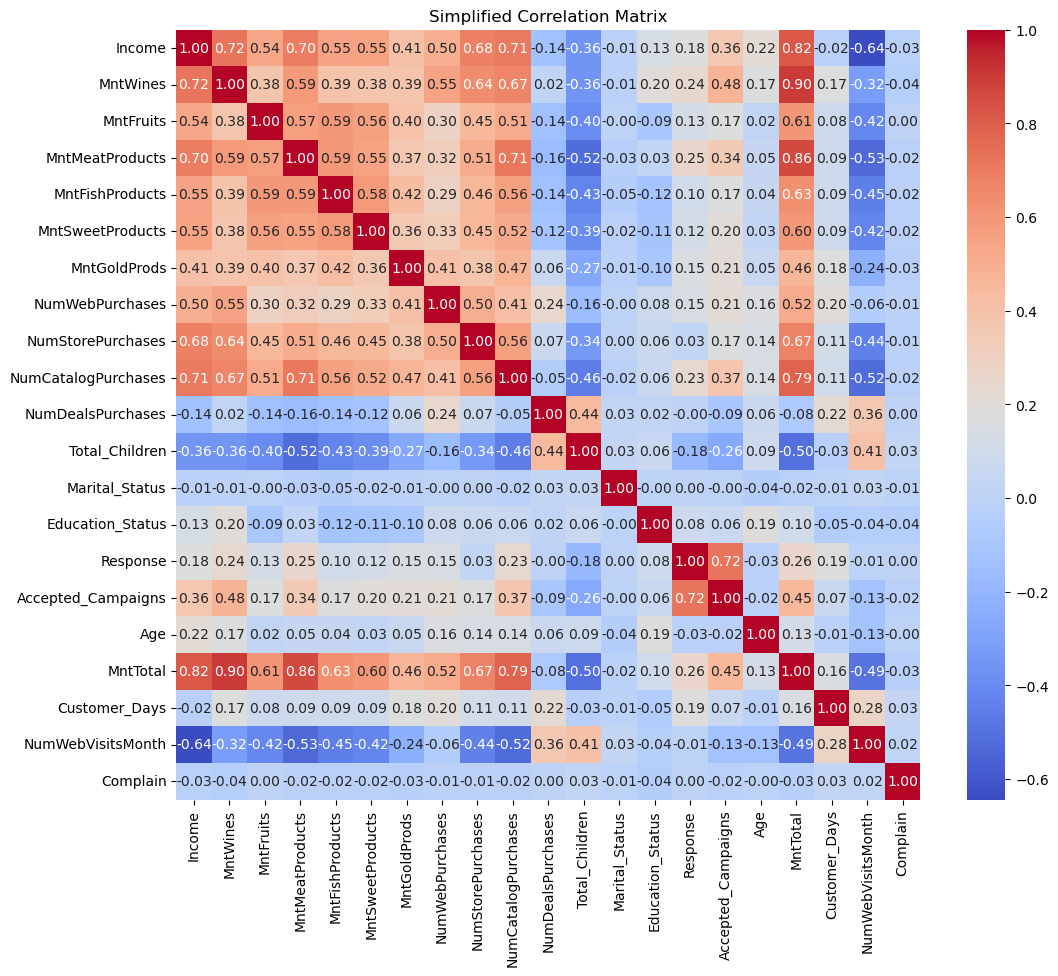

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(ufood_df[key_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Simplified Correlation Matrix')
plt.show()

## Key Insights from the Correlation Matrix

### **Positive Correlations:**
- **Income & Spending :** Strong correlation with **MntWines (0.72)**, **MntMeatProducts (0.70)**, **NumStorePurchases (0.68)**.and   **NumCatalogPurchases (0.71)**.   
- **Customer Loyalty (Customer_Days):** Moderate correlation with **MntTotal (0.28)** and **Total_Accepted_Campaigns (0.27)**.  
- **Campaign Engagement:** Strong correlation between **Accepted_Campaigns** and **Response (0.72)**.  
  *Insight:* Customers responding to recent campaigns are likely to have engaged with past ones.

### **Negative Correlations:**
- **Total Children & Spending:** Negative correlation with **MntTotal (-0.50)** and **Income (-0.36)**.  
  *Insight:* Families with more children tend to be budget-conscious, leading to reduced spending.

- **Web Visits & Spending (NumWebVisitsMonth):** Negative correlation with **MntTotal (-0.49)**.  
  *Insight:* High website visits don’t necessarily result in purchases, indicating browsing without conversion.

### **Weak/No Correlations:**
- **Complaints:** Near-zero correlation with spending and campaign engagement.  
- **Marital Status:** Very weak correlation with spending and campaign responses.  
  *Insight:* Marital status is not a significant factor in purchasing behavior.


# Analysis on Age 

In [36]:
ufood_df['Age'].describe()

count    2021.000000
mean       51.117269
std        11.667616
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

In [41]:
age_groups= [(21,30), (31,40), (41,50), (51,60), (61,70), (71,85)] 

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]: 
          return f"{age_range[0]}-{age_range [1]}" 
    return("Unknown") 

ufood_df['Age_Group']= ufood_df['Age'].apply(assign_age_group)

In [62]:
age_grp_count = ufood_df['Age_Group'].value_counts().sort_index()
percentage_age_group_count = age_grp_count / ufood_df.shape[0] * 100
percentage_age_group_count 

Age_Group
21-30     2.721425
31-40    16.180109
41-50    33.102425
51-60    22.513607
61-70    20.831272
71-85     4.651163
Name: count, dtype: float64

In [63]:
accep_camp = ufood_df[ufood_df['Accepted_Campaigns'] != 0]

In [64]:
age_grp_count = accep_camp['Age_Group'].value_counts().sort_index()
percentage_age_group_count_accepted = age_grp_count / ufood_df.shape[0] * 100
percentage_age_group_count_accepted 

Age_Group
21-30    1.039090
31-40    4.898565
41-50    8.065314
51-60    6.086096
61-70    5.789213
71-85    1.979218
Name: count, dtype: float64

In [77]:
# Acceptance Rate per Age Group
acceptance_rate = (percentage_age_group_count_accepted / percentage_age_group_count) * 100
acceptance_rate

Age_Group
21-30    38.181818
31-40    30.275229
41-50    24.364723
51-60    27.032967
61-70    27.790974
71-85    42.553191
Name: count, dtype: float64

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/3684926236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values, palette='Set1')


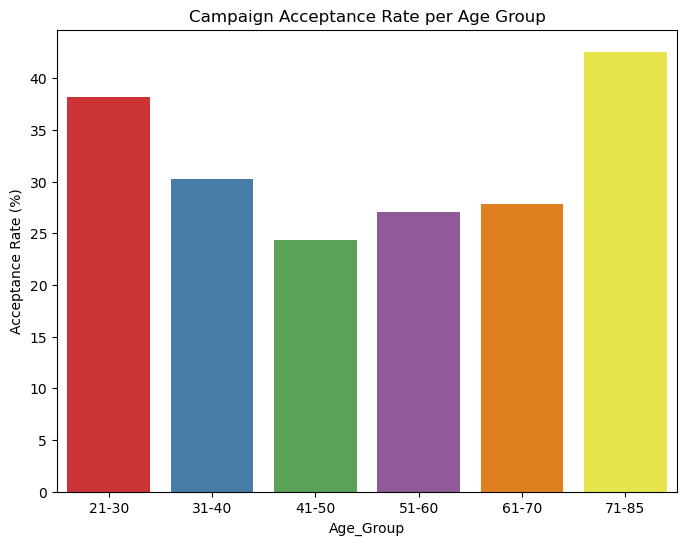

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rate.index, y=acceptance_rate.values, palette='Set1')
plt.title('Campaign Acceptance Rate per Age Group')
plt.ylabel('Acceptance Rate (%)')
plt.show()

- The **71-85** age group has the **highest acceptance rate (~42%)**, suggesting strong engagement despite a smaller population.
- Surprisingly, the **21-30** group also shows a **high acceptance rate (~38%)**, indicating potential for targeting younger customers.
- The **41-50** group has the **lowest acceptance rate (~25%)**, which could indicate lower interest in current campaign strategies for this demographic.


/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/3749173585.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='MntTotal', data=grp_age_by_amt, palette='Set3')


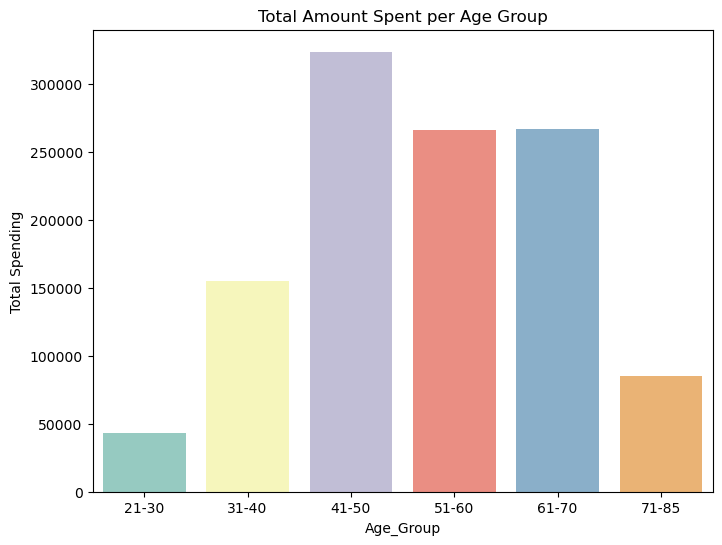

In [49]:
# Total Spending per Age Group
grp_age_by_amt = ufood_df.groupby('Age_Group')['MntTotal'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='MntTotal', data=grp_age_by_amt, palette='Set3')
plt.title('Total Amount Spent per Age Group')
plt.ylabel('Total Spending')
plt.show()

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/674502713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='MntTotal', data=grp_age_by_amt_accepted, palette='coolwarm')


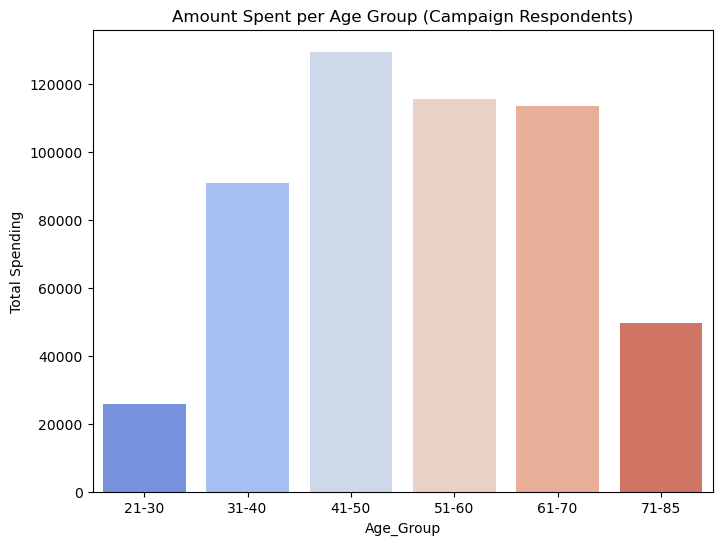

In [50]:
# Spending Among Usual Campaign Respondents
accep_camp = ufood_df[ufood_df['Accepted_Campaigns'] != 0]
grp_age_by_amt_accepted = accep_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='MntTotal', data=grp_age_by_amt_accepted, palette='coolwarm')
plt.title('Amount Spent per Age Group (Campaign Respondents)')
plt.ylabel('Total Spending')
plt.show()

- **Campaign respondents** aged **41-50**, **51-60**, and **61-70** show the **highest total spending**.
- **71-85** group, though small, contributes **significantly** to spending when engaged in campaigns.
- **21-30** respondents show moderate spending, highlighting potential for growth through targeted campaigns.


In [79]:
# Average Spending per Customer (Overall)
avg_spending_per_customer = grp_age_by_amt.copy()
avg_spending_per_customer['Avg_Spending'] = avg_spending_per_customer['MntTotal'] / age_grp_count.values
avg_spending_per_customer

,Age_Group,MntTotal,Avg_Spending
0,21-30,42968,2046.095238
1,31-40,155050,1566.161616
2,41-50,323387,1983.969325
3,51-60,266028,2162.829268
4,61-70,266829,2280.589744
5,71-85,85156,2128.900000


/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/3315352465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Avg_Spending', data=avg_spending_per_customer, palette='coolwarm')


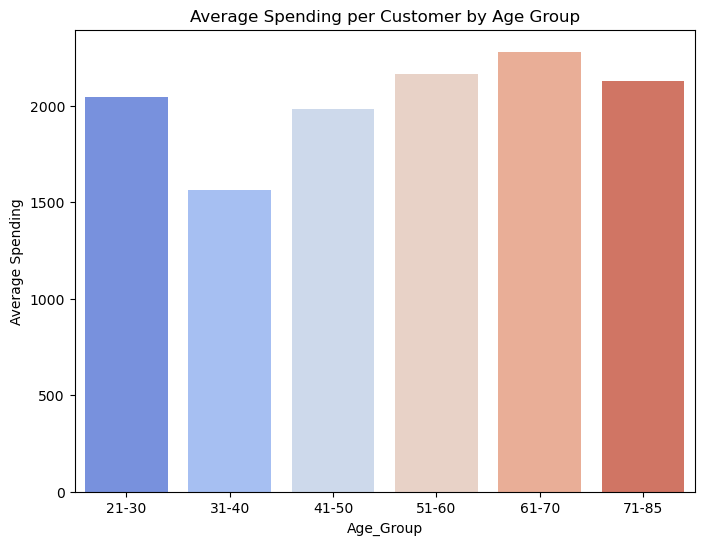

In [80]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Avg_Spending', data=avg_spending_per_customer, palette='coolwarm')
plt.title('Average Spending per Customer by Age Group')
plt.ylabel('Average Spending')
plt.show()

- The **61-70** age group has the **highest average spending per customer (~2,280)**, followed closely by **51-60** and **71-85** groups.
- Despite a smaller customer base, the **21-30** group has a **competitive average spend (~2,046)**, showing potential for premium targeting.
- The **31-40** group has the **lowest average spending (~1,566)**, aligning with their campaign acceptance rate.


In [53]:
# Purchase Behavior by Channel
grp_by_purchase = ufood_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
grp_by_purchase.columns = ['Type_of_Purchase', 'Total_Purchases']
grp_by_purchase

,Type_of_Purchase,Total_Purchases
0,NumWebPurchases,8317
1,NumCatalogPurchases,5345
2,NumStorePurchases,11737


/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/832377441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type_of_Purchase', y='Total_Purchases', data=grp_by_purchase, palette='Blues')


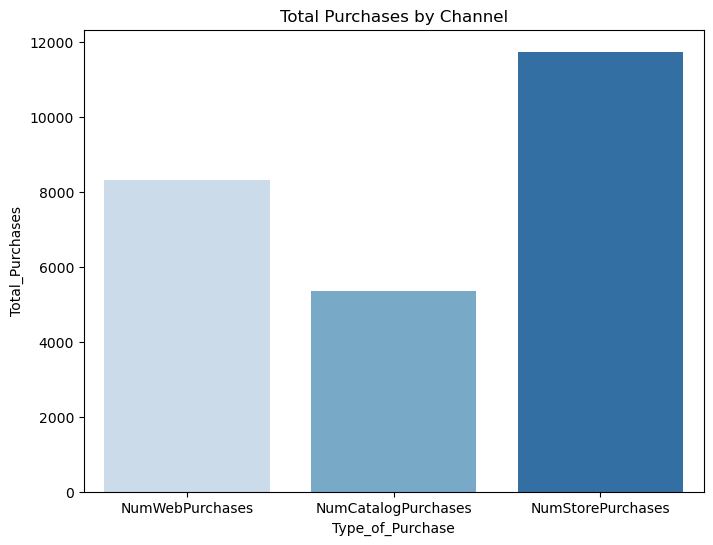

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Type_of_Purchase', y='Total_Purchases', data=grp_by_purchase, palette='Blues')
plt.title('Total Purchases by Channel')
plt.show()

- **Store purchases** dominate, accounting for the **majority of transactions (~11,737 purchases)**.
- **Web purchases (8,317)** and **catalog purchases (5,345)** are significantly lower, suggesting strong preference for in-person shopping experiences.
- This indicates potential to **optimize in-store marketing strategies**, while also exploring ways to boost online engagement.

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/2553899944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type_of_Purchase', y='Total_Purchases', data=grp_by_purchase_accepted, palette='Oranges')


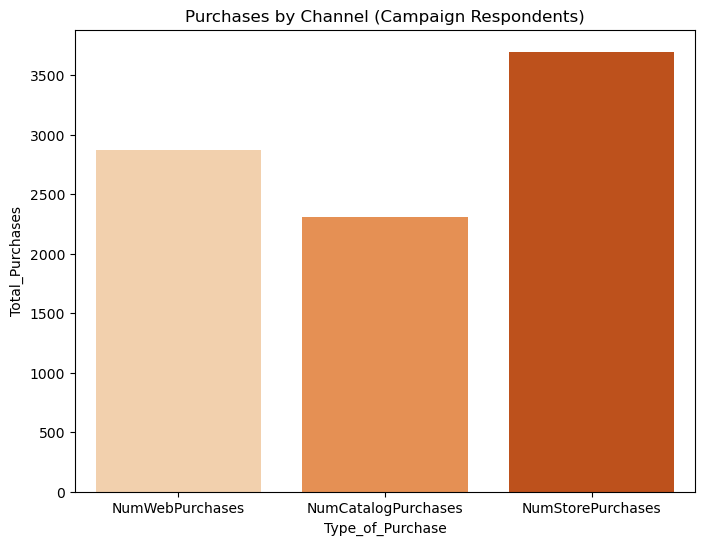

In [55]:
# Purchase Channels Among Campaign Respondents
grp_by_purchase_accepted = accep_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
grp_by_purchase_accepted.columns = ['Type_of_Purchase', 'Total_Purchases']

plt.figure(figsize=(8, 6))
sns.barplot(x='Type_of_Purchase', y='Total_Purchases', data=grp_by_purchase_accepted, palette='Oranges')
plt.title('Purchases by Channel (Campaign Respondents)')
plt.show()

- Even among **campaign respondents**, **store purchases** remain dominant
- **Catalog purchases** are strong among campaign responders

In [81]:
# Channel Preferences by Age Group
channel_by_age = ufood_df.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
channel_by_age = channel_by_age.melt(id_vars='Age_Group', var_name='Channel', value_name='Total_Purchases')
channel_by_age

,Age_Group,Channel,Total_Purchases
0,21-30,NumWebPurchases,205
1,31-40,NumWebPurchases,1117
2,41-50,NumWebPurchases,2592
3,51-60,NumWebPurchases,2003
4,61-70,NumWebPurchases,1914
5,71-85,NumWebPurchases,486
6,21-30,NumCatalogPurchases,206
7,31-40,NumCatalogPurchases,668
8,41-50,NumCatalogPurchases,1524
9,51-60,NumCatalogPurchases,1237


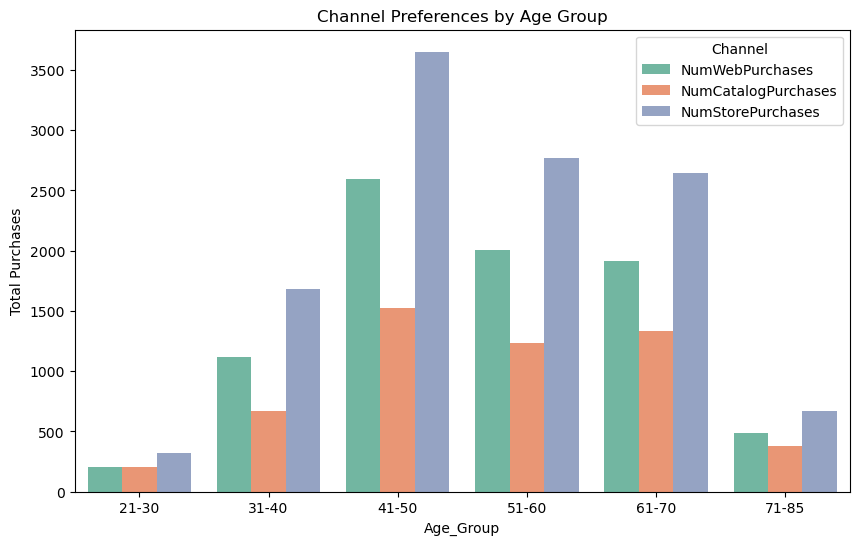

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total_Purchases', hue='Channel', data=channel_by_age, palette='Set2')
plt.title('Channel Preferences by Age Group')
plt.ylabel('Total Purchases')
plt.legend(title='Channel')
plt.show()

- **41-70** prefer **store purchases**, with significant dominance in the **51-60** and **61-70** groups.
- **71-85** and **21-40** customers show balanced behavior with moderate engagement in both **store and catalog** channels, indicating they are responsive to traditional campaigns.


# Marital Status Analysis

**Marital Status Code**
- 1: Widow
- 2: Together
- 3: Single
- 4: Married
- 5: Divorced

In [90]:
ufood_df['Marital_Status_str']= ufood_df['Marital_Status'].map({1:'Widow',2:'Together',3:'Single',4:'Married',5:'Divorced'})

In [91]:
ufood_df['Marital_Status_str'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/971854101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Marital_Status_str',data = ufood_df,palette='Set2' )


Text(0, 0.5, 'Number of Customers')

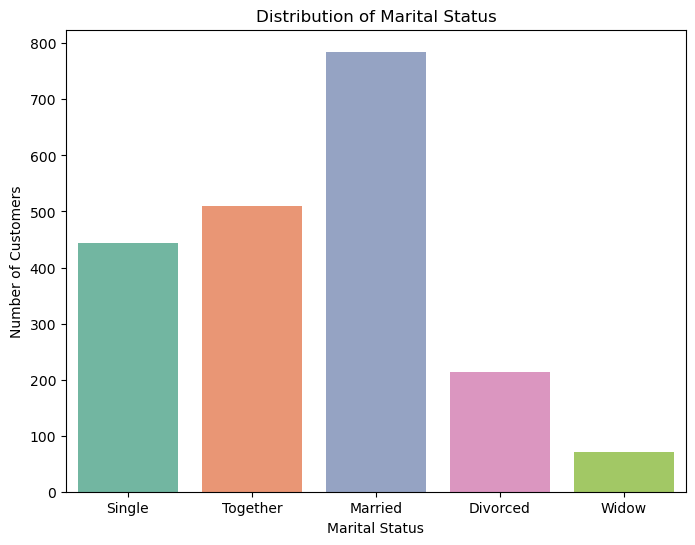

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x ='Marital_Status_str',data = ufood_df,palette='Set2' )
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')


- The **Married** group forms the **largest customer segment**, followed by **Together** and **Single** individuals.
- **Divorced** and **Widowed** customers are **minority groups**, indicating smaller target audiences but with potential for personalized campaigns.
- The distribution highlights that **family-oriented customers (Married/Together)** dominate the customer base, influencing spending behaviors.


In [94]:
# Total Spending by Marital Status
accep_camp = ufood_df[ufood_df['Accepted_Campaigns'] != 0]
grp_by_marital_status = accep_camp.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
grp_by_marital_status

,Marital_Status_str,MntTotal
0,Divorced,55864
1,Married,190779
2,Single,130372
3,Together,123588
4,Widow,23867


/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/1406712360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status_str', y='MntTotal', data=grp_by_marital_status, palette='Set3')


Text(0, 0.5, 'Total Spending')

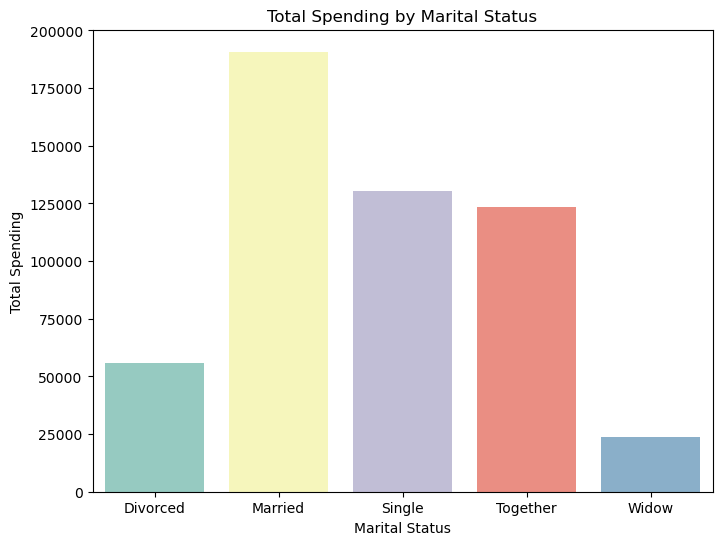

In [111]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status_str', y='MntTotal', data=grp_by_marital_status, palette='Set3')
plt.title('Total Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')


- **Married customers** contribute the **highest total spending (~190,000)**, indicating strong purchasing power.
- **Together** and **Single** customers also show significant spending, suggesting these groups are responsive to product offerings.
- Despite being fewer in number, **Widowed** customers spend a moderate amount (~23,867), indicating potential for niche, high-value targeting.
- **Divorced** customers show the **lowest total spending**

In [99]:
# Campaign Acceptance by Marital Status
marital_acceptance = ufood_df.groupby('Marital_Status_str')['Accepted_Campaigns'].sum().reset_index()


/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/2958655972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status_str', y='Accepted_Campaigns', data=marital_acceptance, palette='coolwarm')


Text(0, 0.5, 'Total Accepted Campaigns')

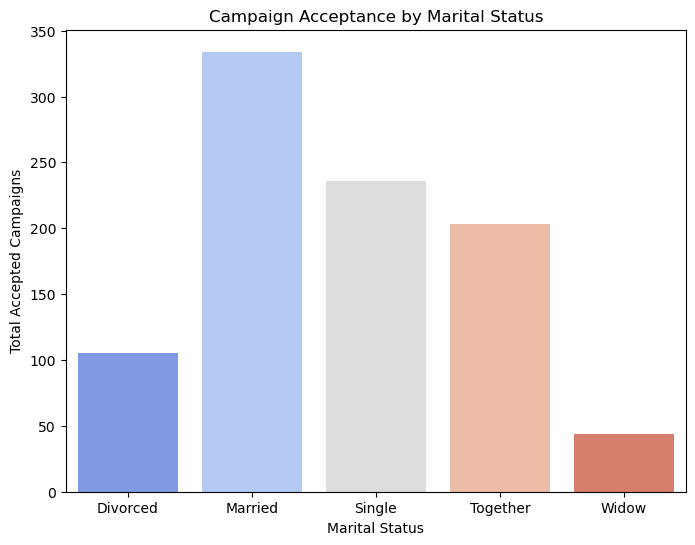

In [112]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status_str', y='Accepted_Campaigns', data=marital_acceptance, palette='coolwarm')
plt.title('Campaign Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Accepted Campaigns')

- **Married customers** exhibit the **highest campaign acceptance rate (~340 campaigns accepted)**, showing strong engagement.
- **Single** and **Together** individuals have moderate acceptance rates, indicating good potential for targeted marketing.
- **Divorced** and **Widowed** customers have a **relatively low acceptance rate**, hinting at possible disengagement with current marketing strategies.

In [106]:
# Purchase Channel Preferences by Marital Status
channel_summary = ufood_df.groupby('Marital_Status_str')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().reset_index()
channel_summary = channel_summary.melt(id_vars='Marital_Status_str', var_name='Channel', value_name='Total_Purchases')


Text(0, 0.5, 'Total Purchases')

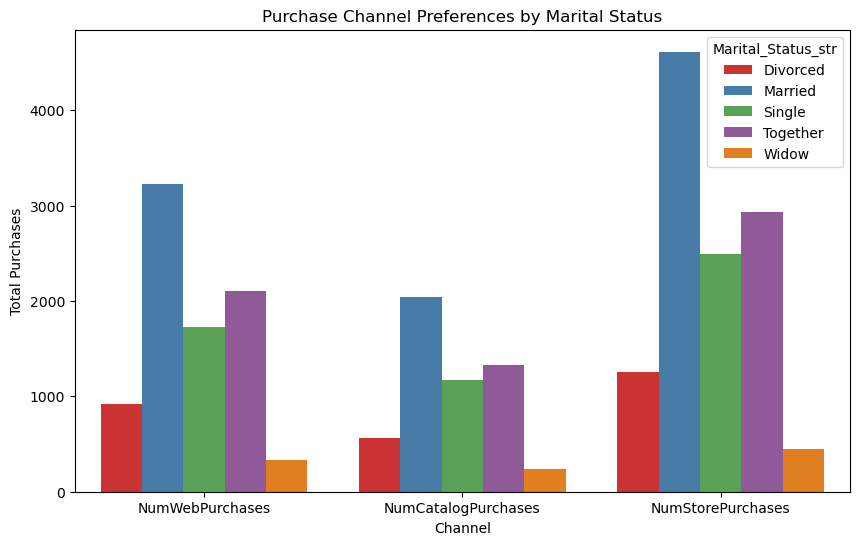

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Total_Purchases', hue='Marital_Status_str', data=channel_summary, palette='Set1')
plt.title('Purchase Channel Preferences by Marital Status')
plt.ylabel('Total Purchases')

- **Store purchases** dominate across all marital statuses, especially among **Married** and **Together** customers.
- **Web purchases** are more popular among **Single** customers, suggesting a higher digital affinity.
- **Catalog purchases** are favored by **Married** and **Together** individuals.

# Education Status Analysis 

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/1365186532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_Status_str', data=ufood_df, palette='Set2')


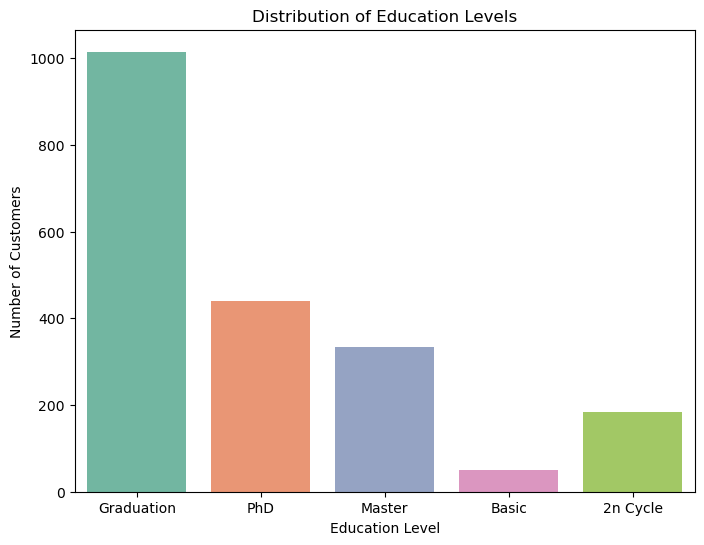

In [113]:
education_mapping = {1: '2n Cycle', 2: 'Basic', 3: 'Graduation', 4: 'Master', 5: 'PhD'}
ufood_df['Education_Status_str'] = ufood_df['Education_Status'].map(education_mapping)

plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Status_str', data=ufood_df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()


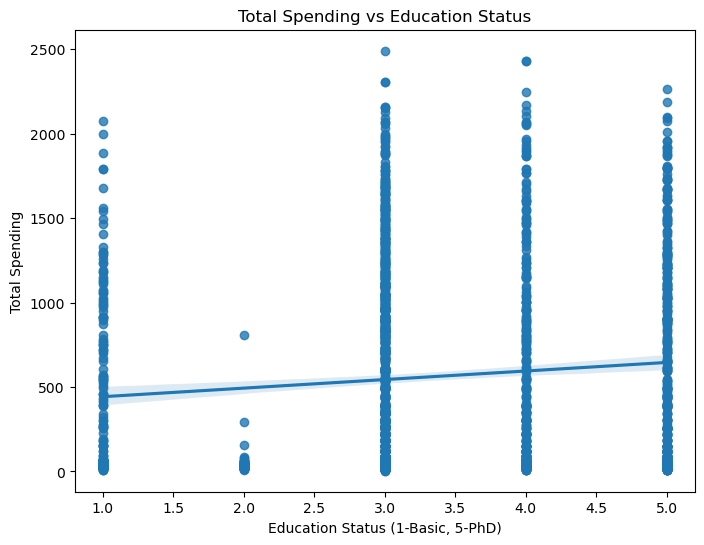

In [114]:
# Total Spending by Education Status
plt.figure(figsize=(8, 6))
sns.regplot(x='Education_Status', y='MntTotal', data=ufood_df)
plt.title('Total Spending vs Education Status')
plt.xlabel('Education Status (1-Basic, 5-PhD)')
plt.ylabel('Total Spending')
plt.show()

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/62671637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education_Status_str', y='MntTotal', data=avg_spending_by_edu, palette='coolwarm')


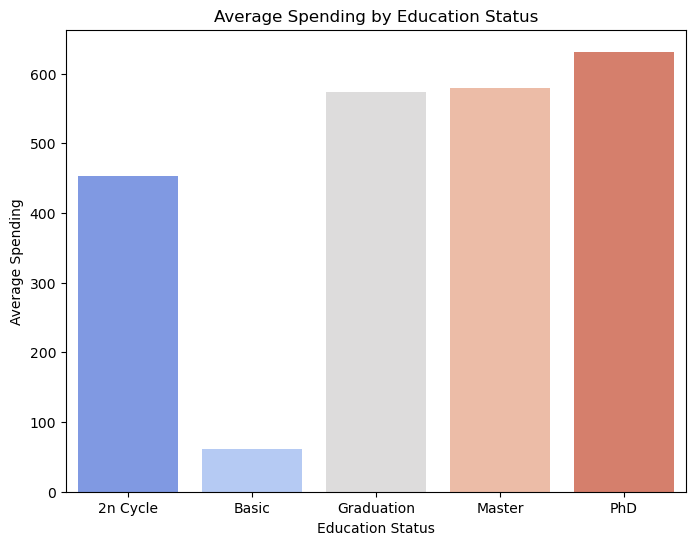

In [115]:
# Average Spending by Education Status
avg_spending_by_edu = ufood_df.groupby('Education_Status_str')['MntTotal'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Education_Status_str', y='MntTotal', data=avg_spending_by_edu, palette='coolwarm')
plt.title('Average Spending by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Average Spending')
plt.show()

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/2577083582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education_Status_str', y='Acceptance_Rate', data=acceptance_rate, palette='Set2')


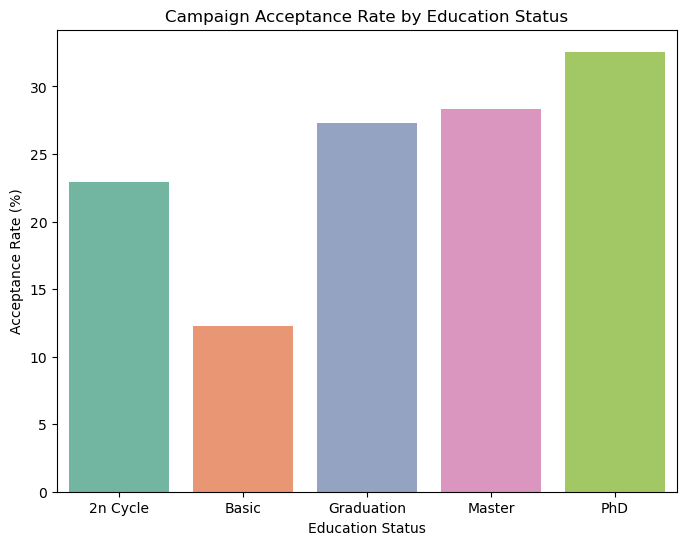

In [118]:
# Campaign Acceptance Rate by Education Status
accep_camp = ufood_df[ufood_df['Accepted_Campaigns'] != 0]
acceptance_rate = accep_camp.groupby('Education_Status_str').size() / ufood_df.groupby('Education_Status_str').size() * 100
acceptance_rate = acceptance_rate.reset_index().rename(columns={0: 'Acceptance_Rate'})

plt.figure(figsize=(8, 6))
sns.barplot(x='Education_Status_str', y='Acceptance_Rate', data=acceptance_rate, palette='Set2')
plt.title('Campaign Acceptance Rate by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Acceptance Rate (%)')
plt.show()

- Customers with **higher education levels (Master’s & PhDs)** tend to **spend more** and show **greater engagement** with marketing campaigns. 
- This indicates relation between **advanced education**, **purchasing power**, and **campaign acceptance**, making them key targets for premium products and personalized marketing strategies.


# Total Children Analysis

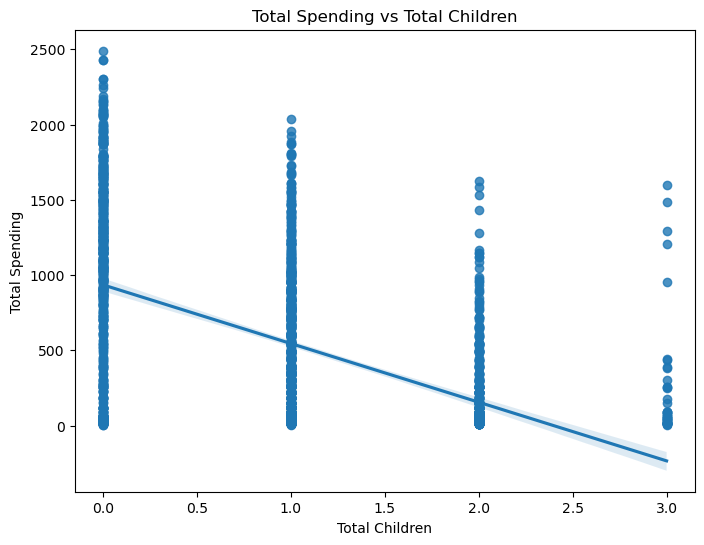

In [119]:
# Total Spending vs Total Children
plt.figure(figsize=(8, 6))
sns.regplot(x='Total_Children', y='MntTotal', data=ufood_df)
plt.title('Total Spending vs Total Children')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')
plt.show()

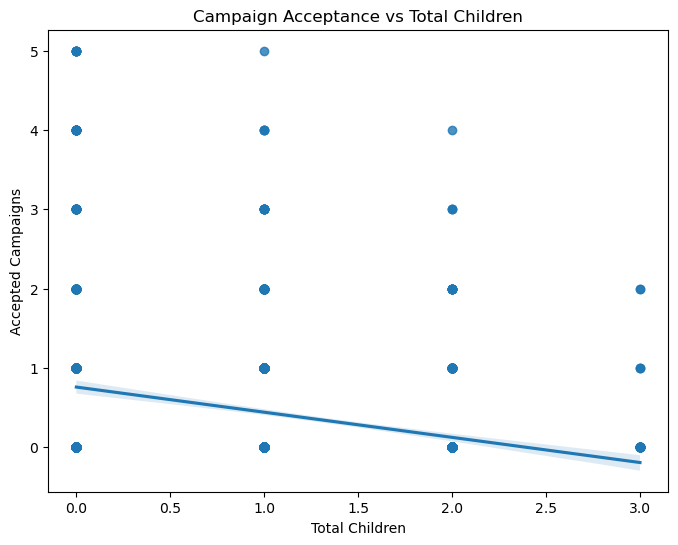

In [120]:
# 2. Campaign Acceptance vs Total Children 
plt.figure(figsize=(8, 6))
sns.regplot(x='Total_Children', y='Accepted_Campaigns', data=ufood_df)
plt.title('Campaign Acceptance vs Total Children')
plt.xlabel('Total Children')
plt.ylabel('Accepted Campaigns')
plt.show()

- Customers with **fewer or no children** tend to **spend more**.
- Individuals with **0-1 children** show a **higher acceptance rate** for marketing campaigns
- Target campaigns towards customers with **fewer children** tend to maximize **engagement and revenue potential**

# Income Analysis 

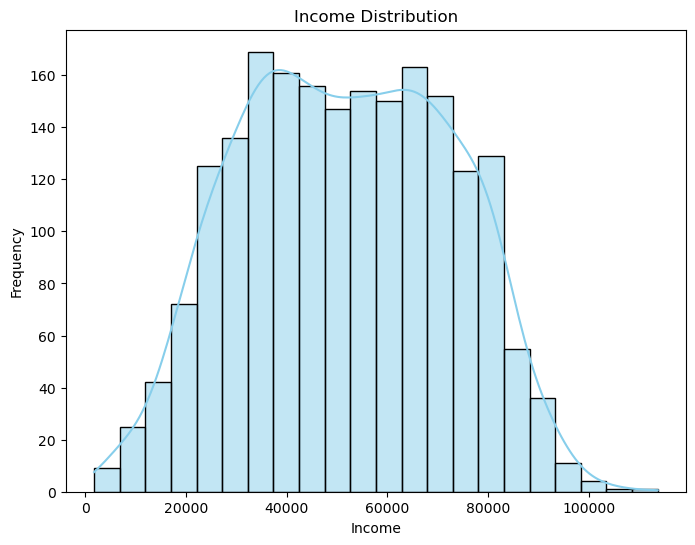

In [122]:
# Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(ufood_df['Income'], kde=True, color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

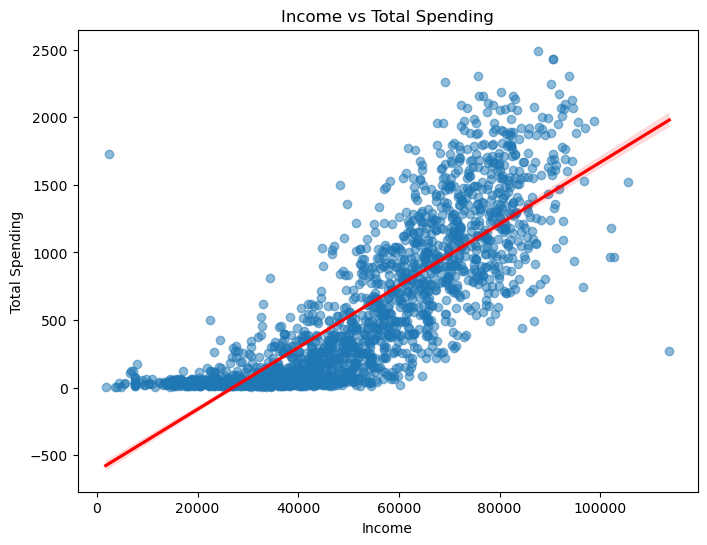

In [123]:
# Income vs Total Spending (Regplot)
plt.figure(figsize=(8, 6))
sns.regplot(x='Income', y='MntTotal', data=ufood_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

/var/folders/wx/bvxq42n11pvgj51wss_hd5bw0000gn/T/ipykernel_63294/255784969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accepted_Campaigns', y='Income', data=ufood_df, palette='Set3')


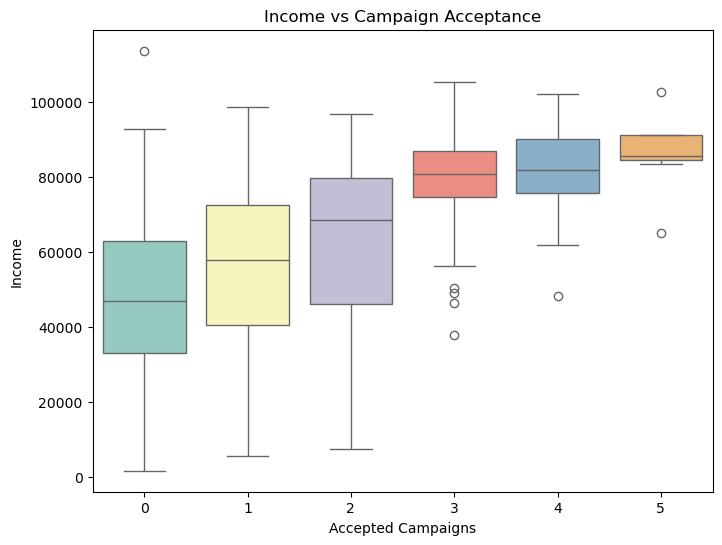

In [124]:
# Income vs Campaign Acceptance (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Accepted_Campaigns', y='Income', data=ufood_df, palette='Set3')
plt.title('Income vs Campaign Acceptance')
plt.xlabel('Accepted Campaigns')
plt.ylabel('Income')
plt.show()

- The income distribution shows a peak in the **mid-range income brackets (30,000–60,000)**, with fewer customers in very low or very high-income ranges.
   
- There is a **strong positive correlation** between income and total spending. As income increases, customers tend to spend more, indicating that **higher-income groups contribute significantly to revenue**.

- Customers with **higher income levels** are more likely to accept marketing campaigns. This suggests that **targeting premium offers** to high-income customers could improve campaign success rates.


# Customer Segmentation

In [127]:
# RFM 
ufood_df['Frequency'] = ufood_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
ufood_df['Monetary'] = ufood_df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

rfm_df = ufood_df[['Recency', 'Frequency', 'Monetary']]

In [129]:
rfm_df.head()

,Recency,Frequency,Monetary
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422


In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)


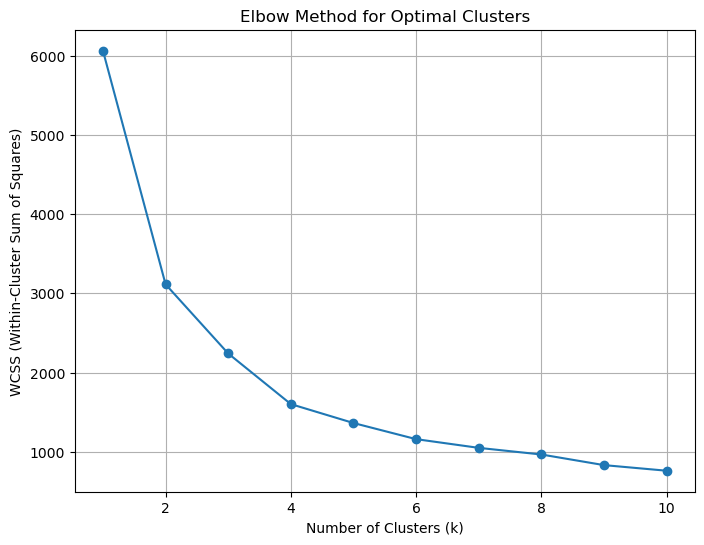

In [136]:
# Calculating WCSS(Within-Cluster Sum of Squares) for different cluster counts
wcss = []
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [137]:
# Applying K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
ufood_df['Customer_Segment'] = kmeans.fit_predict(rfm_scaled)

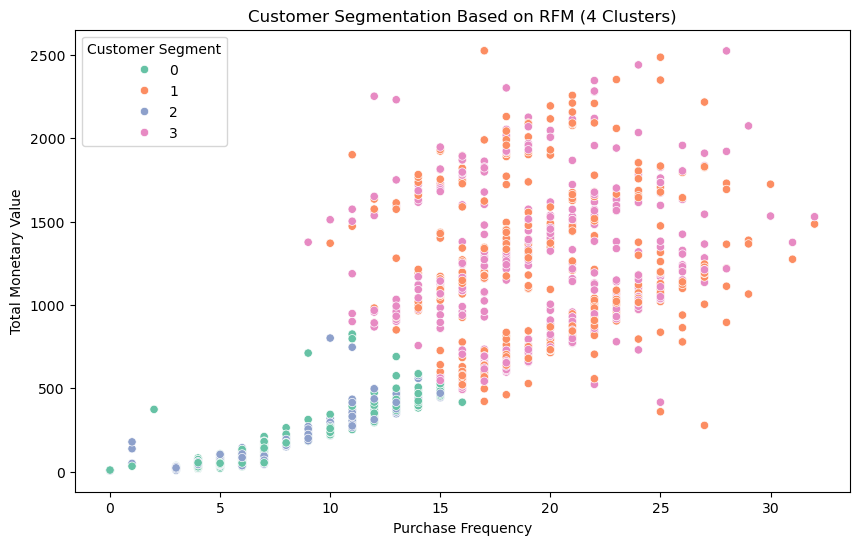

In [139]:
# Visualizing Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Customer_Segment', data=ufood_df, palette='Set2')
plt.title('Customer Segmentation Based on RFM (4 Clusters)')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Monetary Value')
plt.legend(title='Customer Segment')
plt.show()

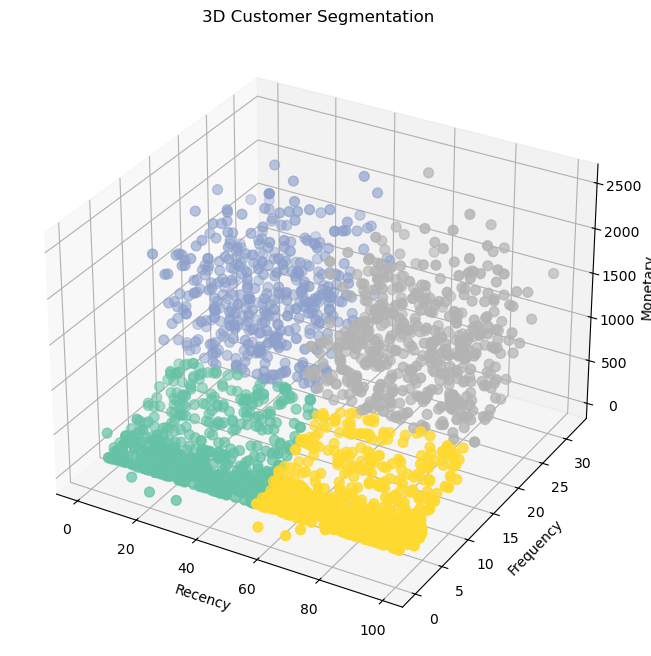

In [140]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ufood_df['Recency'], ufood_df['Frequency'], ufood_df['Monetary'],
           c=ufood_df['Customer_Segment'], cmap='Set2', s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation')
plt.show()


### **Customer Profiling Based on Segmentation**

1. **Segment 0 - Low Engagement Customers:**
   - **Recency:** High (haven't purchased recently).
   - **Frequency:** Low (few purchases).
   - **Monetary:** Low (minimal spending).
   - **Profile:** Disengaged customers who need reactivation strategies, such as personalized offers or re-engagement campaigns.

2. **Segment 1 - Recent High Spenders:**
   - **Recency:** Low (recent purchases).
   - **Frequency:** Moderate.
   - **Monetary:** High spending behavior.
   - **Profile:** Valuable customers with high potential. loyalty programs can retain them.

3. **Segment 2 - Regular Shoppers:**
   - **Recency:** Moderate.
   - **Frequency:** High (frequent purchases).
   - **Monetary:** Moderate spending levels.
   - **Profile:** Customers who appreciate regular engagement. Upsell and cross-sell strategies works.

4. **Segment 3 - High-Value Loyal Customers:**
   - **Recency:** Low (very recent activity).
   - **Frequency:** High (frequent purchases).
   - **Monetary:** Very high (top spenders).
   - **Profile:** Most loyal and profitable segment.Give exclusive offers, early access to products, and VIP programs to maintain loyalty.


## 📊 Overall Findings, Insights, and Recommendations

### **Findings:**
- **Age** **41-50** spends the most; **21-30** & **71-85** respond better to campaigns.
- **Higher income** individuals spend more and have higher campaign acceptance rates.
- **Married** and **Single** customers contribute significantly to spending and campaign acceptance.
- Customers with **higher education levels (Masters/PhD)** spend and accept campaigns more.
- **Customers without children** tend to spend more and are more receptive to campaigns.
- **Store purchases** dominate, but web channels also show strong engagement.
- **RFM Segmentation** identified distinct customer groups based on purchasing behavior.

### **Insights:**
- **High-income, educated individuals** are the most valuable customers.
- **Younger (21-30)** and **older (71-85)** age groups are more campaign-responsive despite lower spending.
- **Families with children** show lower spending and campaign engagement.
- **Frequent in-store buyers** are key for revenue, but online channels are growing.

### **Recommendations:**
- **Personalize campaigns** for younger and older demographics to boost engagement.
- Focus on **loyal, high-income customers** with exclusive offers.
- Enhance **online marketing strategies** to increase web purchase rates.
- Develop **family-friendly promotions** to attract customers with children.
- Leverage **RFM segments** to tailor retention strategies for different customer groups.
